In [1]:
import numpy as np
import csv
%matplotlib inline
from IPython.display import display,Markdown

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

# Part 1


|Size |Orbit|habitable | Count|
|-----|-----|----------|------|
|big|near|yes|20|
|big|far|yes|170|
|small|near|yes|139|
|small|far|yes|45|
|big|near|no|130|
|big|far|no|30|
|small|near|no|11|
|small|far|no|255|

In [2]:
tree_data = np.array([[1,0,1,20],
                      [1,1,1,170],
                      [0,0,1,139],
                      [0,1,1,45],
                      [1,0,0,130],
                      [1,1,0,30],
                      [0,0,0,11],
                      [0,1,0,255]
                     ])
def calculate_entropy(data):
    pos_instances = 0
    neg_instances = 0
    for row in data:
        #is habitible
        if(row[-2]==1):
            pos_instances+=row[-1]
        else:
            neg_instances+=row[-1]
    total = pos_instances+neg_instances
    p_p = float(pos_instances)/float(total)
    p_n = float(neg_instances)/float(total)
    return -1.0*p_p*math.log(p_p,2)-1.0*p_n*math.log(p_n,2)
def calculate_gain(row_num,data):
    subset_array = []
    for row in data:
        if(row[row_num]==1):
            subset_array.append(row)
    subset_array = np.array(subset_array)
    #print(subset_array)
    ent_total = calculate_entropy(data)
    print("total entropy: "+str(ent_total))
    print("entropy in positive data: "+str(calculate_entropy(subset_array)))
    return calculate_entropy(data)-(subset_array.shape[1]/data.shape[1])*\
        calculate_entropy(subset_array)
#def calc_gain(col_num_data):
#    
#print(calculate_entropy(tree_data))

#print(calculate_entropy(tree_data))
#print(calculate_entropy(tree_data))
size_gain = calculate_gain(0,tree_data)
orbit_gain = calculate_gain(1,tree_data)

print("size gain: "+str(size_gain))
print("orbit gain: "+str(orbit_gain))
print("\nOrbit gain is larger therefore subsetting by orbit\n\n")
orbit_far = []
orbit_near = []
for row in tree_data:
    if(row[1]==1):
        orbit_far.append(row)
    else:
        orbit_near.append(row)
orbit_far=np.array(orbit_far)
orbit_near=np.array(orbit_near)
print("Subsetted by far orbit")
print(orbit_far)
print("\nSubsetted by near orbit")
print(orbit_near)

print("\n Working on Far Orbit Branch")
orbit_far_small=[]
orbit_far_big=[]
for row in orbit_far:
    if(row[0]==1):
        orbit_far_big.append(row)
    else:
        orbit_far_small.append(row)
orbit_far_big=np.array(orbit_far_big)
orbit_far_small=np.array(orbit_far_small)
print("\nFar Orbit Big Planet")
print(orbit_far_big)

print("\nFar Orbit Small Planet")
print(orbit_far_small)


print("\n\n Working on Near Orbit Branch")
orbit_near_small=[]
orbit_near_big=[]
for row in orbit_near:
    if(row[0]==1):
        orbit_near_big.append(row)
    else:
        orbit_near_small.append(row)
orbit_near_big=np.array(orbit_near_big)
orbit_near_small=np.array(orbit_near_small)
print("\nNear Orbit Big Planet")
print(orbit_near_big)

print("\nNear Orbit Small Planet")
print(orbit_near_small)




total entropy: 0.9969501570069956
entropy in positive data: 0.9946937953613058
total entropy: 0.9969501570069956
entropy in positive data: 0.9858150371789198
size gain: 0.002256361645689875
orbit gain: 0.011135119828075801

Orbit gain is larger therefore subsetting by orbit


Subsetted by far orbit
[[  1   1   1 170]
 [  0   1   1  45]
 [  1   1   0  30]
 [  0   1   0 255]]

Subsetted by near orbit
[[  1   0   1  20]
 [  0   0   1 139]
 [  1   0   0 130]
 [  0   0   0  11]]

 Working on Far Orbit Branch

Far Orbit Big Planet
[[  1   1   1 170]
 [  1   1   0  30]]

Far Orbit Small Planet
[[  0   1   1  45]
 [  0   1   0 255]]


 Working on Near Orbit Branch

Near Orbit Big Planet
[[  1   0   1  20]
 [  1   0   0 130]]

Near Orbit Small Planet
[[  0   0   1 139]
 [  0   0   0  11]]


# Final Tree
``` 
                            Orbital Radius
                       /                    \
                      /                      \
               Far Orbit                     Near Orbit
               /                               \
              /                                 \
             /                                   \
            /                                     \
           /                                       \
      Size Of Planet                         Size of Planet
      /           \                         /            \
     /             \                       /              \
    /               \                     /                \
 Big Planet    Small Planet          Big Planet       Small Planet
 Habitible      Not Habitible        Not Habitible     Habitible
```

# Part 2
the algorithm used normalizes data because the standard deviation is often much smaller then 1. We are using a normal probability density function to calculate the probabilities.
## Describing Data
#### Printing Shape of Imported Data

In [3]:

labels=[]
with open("wine_train_set.csv") as csv_file:
    train_data = csv.reader(csv_file, delimiter=',', quotechar='|')
    labels = train_data.__next__()
print(labels)
my_data = np.loadtxt('wine_train_set.csv', delimiter=',',skiprows=1)
MAX_QUALITY=10
MIN_QUALITY=0
NUM_ATTRIBUTES = len(labels)-1
print(my_data)
#calculates probability from input data
def prob_fn(variance,mean,x):
    first_half = (math.sqrt(2.0))
    in_exp = (float(x)-float(mean))**2/variance
    in_exp = -0.5*(in_exp)
    out = math.exp(in_exp)/first_half#normal_fn(math.exp(in_exp)/first_half)
    return out
def normal_fn(data):
    return math.atan(data)/math.pi+0.5

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
[[ 5.6   0.21  0.24 ...  0.31 11.5   7.  ]
 [ 6.2   0.3   0.31 ...  0.39 12.9   7.  ]
 [ 6.4   0.27  0.32 ...  0.48  9.4   5.  ]
 ...
 [ 8.9   0.32  0.49 ...  0.34  9.4   5.  ]
 [ 6.4   0.25  0.32 ...  0.58 10.8   7.  ]
 [ 7.7   0.38  0.23 ...  0.41 13.6   6.  ]]


# Showing Wine Quality Statistics

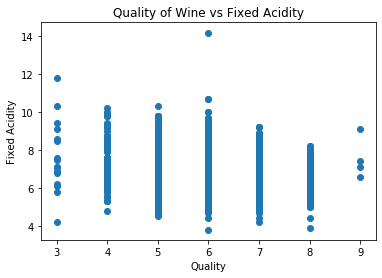

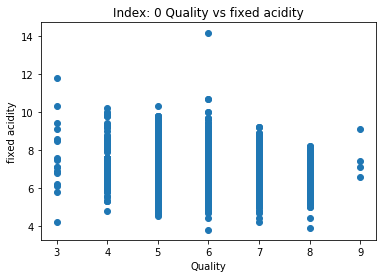

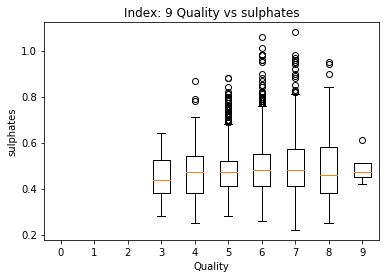

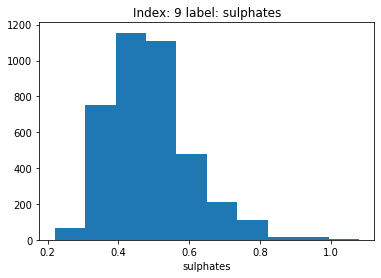

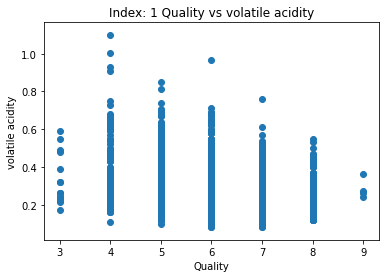

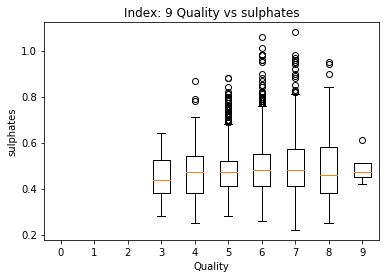

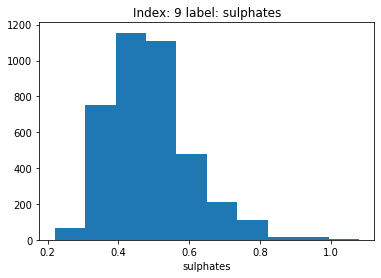

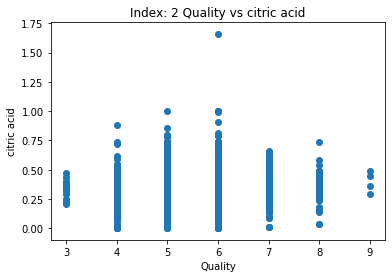

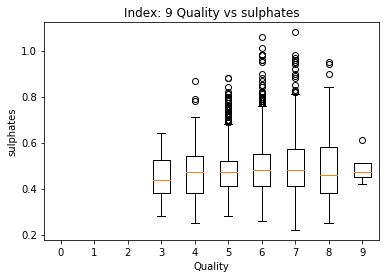

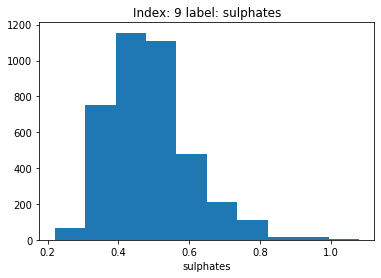

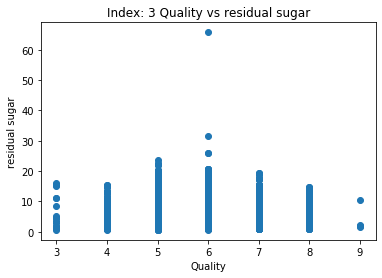

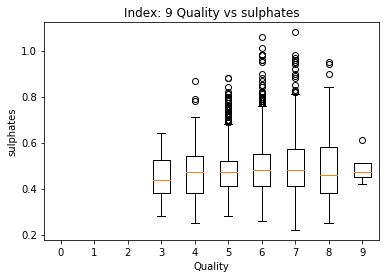

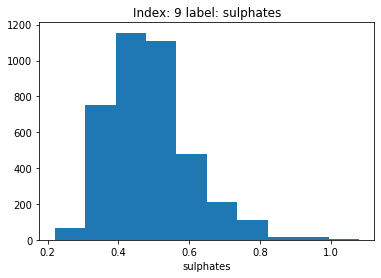

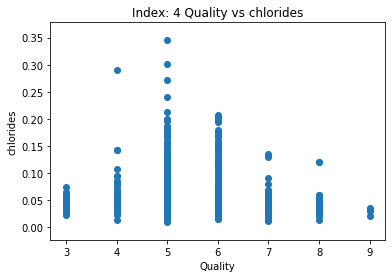

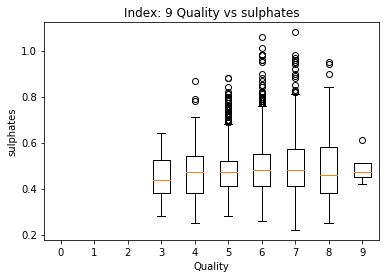

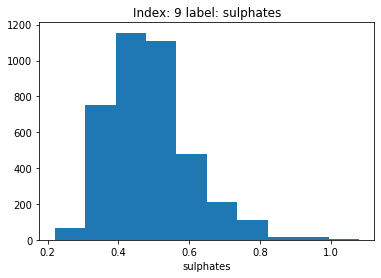

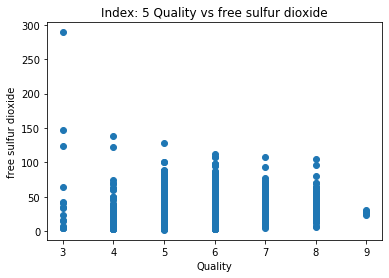

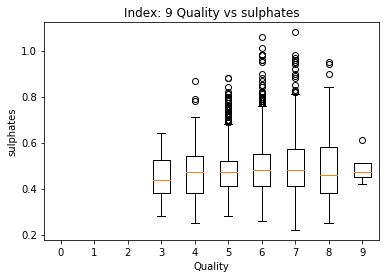

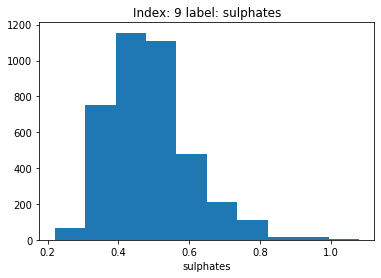

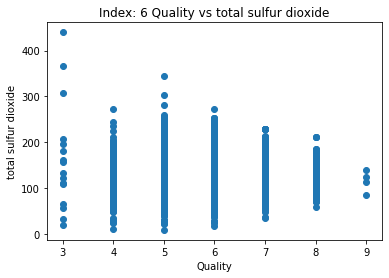

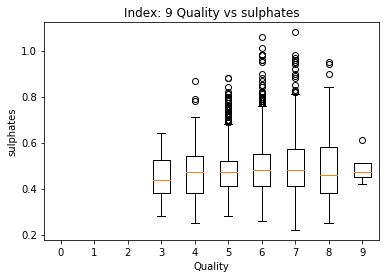

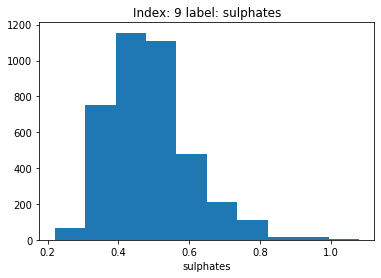

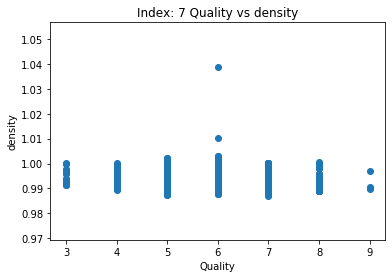

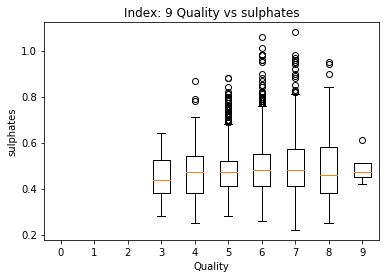

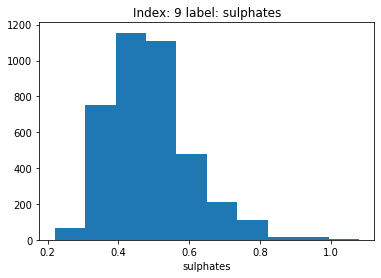

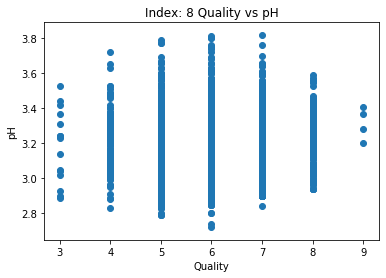

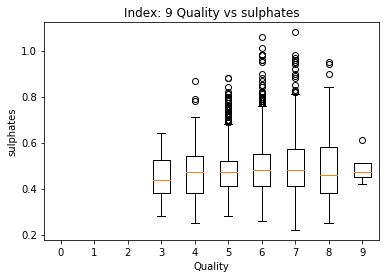

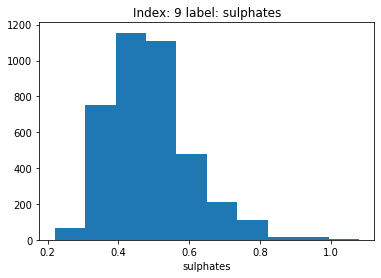

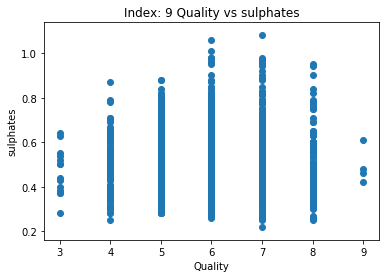

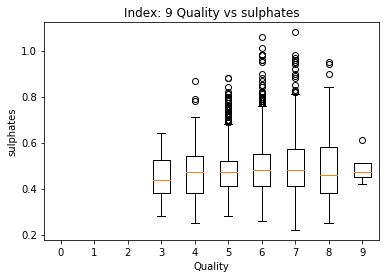

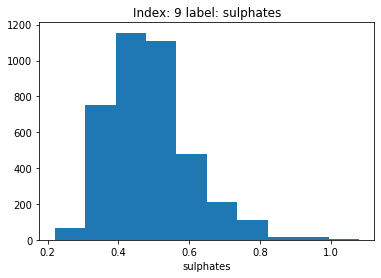

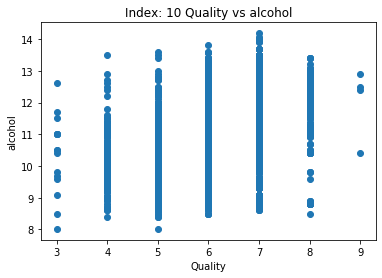

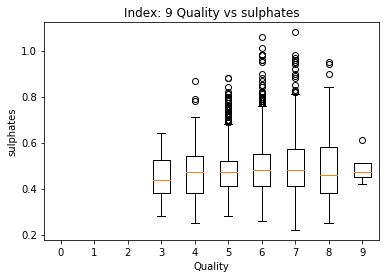

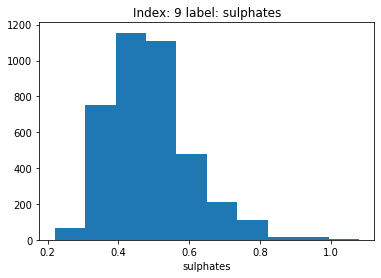

In [4]:
plt.title("Quality of Wine vs Fixed Acidity")
plt.xlabel("Quality")
plt.ylabel("Fixed Acidity")
plt.scatter(my_data[:,-1],my_data[:,0])
plt.show()

for i in range(0,my_data.shape[1]-1):
    plt.title("Index: "+str(i)+" Quality vs "+labels[i])
    plt.xlabel("Quality")
    plt.ylabel(labels[i])
    plt.scatter(my_data[:,-1],my_data[:,i])
    plt.show()
    data=[]
    for i in range(0,10):
        data.append([])
    for row in my_data:
        data[int(round(row[-1]))].append(row[i])
    #print(data)
    plt.title("Index: "+str(i)+" Quality vs "+labels[i])
    plt.xlabel("Quality")
    plt.ylabel(labels[i])
    plt.boxplot(data,labels=["0","1","2","3","4","5","6","7","8","9"])
    plt.show()
    
    plt.title("Index: "+str(i)+" label: "+labels[i])
    plt.xlabel(labels[i])
    plt.hist(my_data[:,i])
    plt.show()

In [5]:
Y_Number=[]
for i in range(0,11):
    Y_Number.append(0)

In [6]:
for row in my_data:
    quality = row[11]
    Y_Number[(int(quality))]+=1
print(Y_Number)

[0, 0, 0, 16, 130, 1166, 1758, 704, 140, 4, 0]


In [7]:
"""Takes array type and returns variance"""
def calculate_variance(data):
    mean = calculate_mean(data)
    sum = 0.0
    for i in data:
        sum+=(float(i)-float(mean))**2.0
    return sum/float(len(data))
"""Takes array type and returns mean"""
def calculate_mean(data):
    sum = 0.0
    for i in data:
        sum+=float(i)
    return sum/float(len(data))

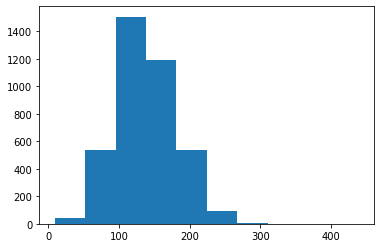

[150. 106. 174. ... 131. 114.  95.]
variance fixed acidity	0.7281495376048622
variance volatile acidity	0.009939864009020012
variance citric acid	0.014644360774123536
variance residual sugar	26.041181904514787
variance chlorides	0.0004568517925278385
variance free sulfur dioxide	292.9602829970729
variance total sulfur dioxide	1801.6978366622886
variance density	9.046107783654085e-06
variance pH	0.02335569577695505
variance sulphates	0.012964421013627847


mean fixed acidity	6.8603241449719246
mean volatile acidity	0.277491066870853
mean citric acid	0.33410413476263084
mean residual sugar	6.423175089331289
mean chlorides	0.04573813169984722
mean free sulfur dioxide	35.4552067381317
mean total sulfur dioxide	138.3843797856049
mean density	0.9940532478305207
mean pH	3.1888386932108124
mean sulphates	0.48909647779479687


In [8]:
#printing variances
plt.hist(my_data[:,6])
plt.show()
print(my_data[:,6])
for i in range(0,10):
    print("variance "+labels[i]+"\t"+str(calculate_variance(my_data[:,i])))
print("\n")
#printing variances
for i in range(0,10):
    print("mean "+labels[i]+"\t"+str(calculate_mean(my_data[:,i])))

# Calculating Y Priors

In [9]:
def calculate_y_priors(data):
    Y_Prior=[]
    num_samples = data.shape[0]
    for i in range(0,MAX_QUALITY):
        Y_Prior.append(0)
    for i in range(0,MAX_QUALITY):
        Y_Prior[i]=Y_Number[i]/num_samples
    return Y_Prior
y_prior = calculate_y_priors(my_data)
for i in range(0,len(y_prior)):
    print("Y prior "+str(labels[i])+": "+ str(y_prior[i]))


Y prior fixed acidity: 0.0
Y prior volatile acidity: 0.0
Y prior citric acid: 0.0
Y prior residual sugar: 0.00408371618172537
Y prior chlorides: 0.033180193976518634
Y prior free sulfur dioxide: 0.29760081674323635
Y prior total sulfur dioxide: 0.44869831546707506
Y prior density: 0.17968351199591628
Y prior pH: 0.03573251659009699
Y prior sulphates: 0.0010209290454313426


In [10]:
# Returns data sorted by quality
# output: filtered_data[Quality][xi][entry]
def filter_data_by_quality(data):
    out_list = []
    for i in range(MIN_QUALITY,MAX_QUALITY+1):
        out_list.append(np.array([]))
    #print(data)
    #for i in range(MIN_QUALITY,MAX_QUALITY+1):
    #    out_list.append(np.array([]))
    
    for quality in range(MIN_QUALITY,MAX_QUALITY+1):
        for row in data:
            #print(row)       
            if(row[-1]==quality):
                try:
                    #print(row[:-1])
                    out_list[quality] = np.vstack((out_list[quality],row))
                except:
                    out_list[quality] = row
                #out_list[quality].append(row[:-1])
                
    return out_list
#print(filter_data_by_quality(my_data))

In [11]:

"""Runs fn on result of filtered data"""
def run_on_data(data,fn):
    out = []
    for quality in data:
        to_append = np.array([])
        #transposing data to get column
        for col in quality.T:
            #print("")
            #print(col)
            to_append=np.hstack((to_append,fn(col)))
        out.append(to_append)
    return out

In [12]:
#filtered_data = filter_data_by_quality(my_data)
#variance = run_on_data(filtered_data,calculate_variance)
#mean = run_on_data(filtered_data,calculate_mean)
#print("VARIANCE")
#print(variance)
#print("MEAN")
#print(mean)

In [13]:
# calculating probabilities
#print(mean)
#print(prob)
#gen
#prob=[]
def get_prob_given_quality(variance,mean,xi,quality,number):
    assert(type(xi)==int)
    assert(type(quality)==int)
    try:
        v = variance[quality][xi]
    except IndexError:
        return 0.0
    m = mean[quality][xi]
    first_half = (math.sqrt(2.0*math.pi*v))
    in_exp = (float(number)-float(m))**2/v
    in_exp = -0.5*(in_exp)
    out = prob_fn(v,m,number)#normal_fn(math.exp(in_exp)/first_half)
    if(out<0.0):
        print("less than zero")
    if(out>1.0):
        print("normal bigger than 1?")
        print("\tvariance:"+str(v))
        print("\tmean: "+str(m))
        print("\tnumber: "+str(number))
        print("\tfirst half: "+str(first_half))
        print("\tin_exp: "+str(in_exp))
        print("\toutput: "+str(out))
    
    return out

# Evaluating model on test data

## 2b Determine the prior for each Yk for the training data.

Y=0: 0.0

Y=1: 0.0

Y=2: 0.0

Y=3: 0.00408371618172537

Y=4: 0.033180193976518634

Y=5: 0.29760081674323635

Y=6: 0.44869831546707506

Y=7: 0.17968351199591628

Y=8: 0.03573251659009699

Y=9: 0.0010209290454313426

## 2c Determine the probability of the evidence for each Xi for the training data

x[0]: 0.23756945547730074

x[1]: 0.5623090370553327

x[2]: 0.5226054589525276

x[3]: 0.6536617833459873

x[4]: 0.48149804151446646

x[5]: 0.7042326745488189

x[6]: 0.6811199969199473

x[7]: 0.4223839148723331

x[8]: 0.5427484059248361

x[9]: 0.20522790814270195

x[10]: 0.5087555254817119

## 2d Determine the probability of the likelihood of evidence for each Xi for the training data.

x[0|Y]: 0.0

x[1|Y]: 0.0

x[2|Y]: 0.0

x[3|Y]: 0.0

x[4|Y]: 0.0

x[5|Y]: 0.0

x[6|Y]: 0.0

x[7|Y]: 0.0

x[8|Y]: 0.0

x[9|Y]: 0.0

x[10|Y]: 0.0

Accuracy: 0.4895354772843288


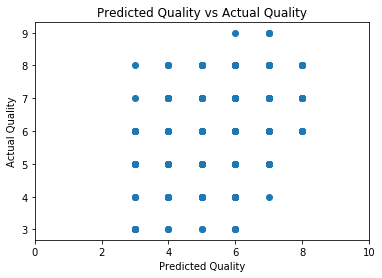

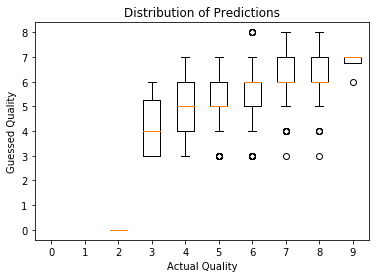

In [14]:

class Model:
    def get_prob(self,Y,x,print_prob=False):
        p_x_g=[]
        p_x=[]

        for xi in range(0,len(x)):
            p_x_g.append(get_prob_given_quality(
                self.variance_given_k,self.mean_given_k,
                xi,int(Y), x[xi]))
            first_half = (math.sqrt(2.0*math.pi*self.variance[xi]))
            in_exp = (x[xi]-self.mean[xi])/self.variance[xi]
            in_exp = -0.5*(in_exp**2)
            p_x.append(prob_fn(self.variance[xi],self.mean[xi],x[xi]))
        if print_prob:
            if(self.printedRow==False):
                self.printedRow=True
                display(Markdown("## 2c Determine the probability of the evidence for each Xi for the training data"))
                for i in range(0,len(p_x)):
                    display(Markdown("x["+str(i)+"]: "+str(p_x[i])))
                display(Markdown("## 2d Determine the probability of the likelihood of evidence for each Xi for the training data."))
                for i in range(0,len(p_x_g)):
                    display(Markdown("x["+str(i)+"|Y]: "+str(p_x_g[i])))
        top = 1.0
        bottom=1.0
        for p in p_x_g:
            top*=p
        top*=self.P_Y[int(Y)]
        for p in p_x:
            bottom*=p

        return normal_fn(top/bottom)
    def get_most_likely(self,x,print_prob=False):
        probs = []
        #print("\n")
        for y in range(MIN_QUALITY,MAX_QUALITY):
            #print(y)
            probs.append(self.get_prob(y,x,print_prob))
        #print("\n")
        #print(probs)
        #print(max(probs))
        max_p=0
        max_index=0
        for i in range(0,len(probs)):
            if probs[i]>max_p:
                max_index=i
                max_p=probs[i]

        return max_index
            
    P_Y=[]
    variance_given_k=[]
    mean_given_k=[]
    variance=[]
    mean=[]
    printedRow=False
def generate_model(data_in,labels,print_prob=False):
    model_out = Model()
    filtered_data = filter_data_by_quality(data_in)
    variance_given_k = run_on_data(filtered_data,calculate_variance)
    mean_given_k = run_on_data(filtered_data,calculate_mean)
    #print(mean_given_k)
    variance = []
    mean = []
    probs = []
    
    for col in data_in.T[:-1]:
        variance.append(calculate_variance(col))
        mean.append(calculate_mean(col))

    correct = 0
    total = 0
    y_priors = calculate_y_priors(data_in)
    model_out.variance_given_k=variance_given_k
    model_out.mean_given_k=mean_given_k
    model_out.variance=variance
    model_out.mean = mean
    model_out.P_Y=y_priors
    
    if print_prob:
        display(Markdown("## 2b Determine the prior for each Yk for the training data."))
        for i in range(0,len(y_priors)):
            display(Markdown("Y="+str(i)+": "+str(y_priors[i])))
        #for i in range(0,)
    return model_out
# 2e Evaluate Model
def eval_model(model,data_in,labels,print_prob=False):
    wrong_num = 0
    predicted_data = []
    predicted_mat = np.array((0,2))
    for row in data_in:
        
        predicted = model.get_most_likely(row[:-1],print_prob)
        predicted_data.append(predicted)
        actual = row[-1]
        predicted_mat=np.vstack([predicted_mat,[predicted,actual]])
        if(predicted!=int(actual)):
            #print("wrong: Predicted: "+str(predicted)+" Actual: "+str(actual))
            wrong_num+=1
    print("Accuracy: "+str(1.0-float(float(wrong_num)/float(data_in.shape[0]))))
    plt.scatter(predicted_data,data_in[:,-1])
    plt.xlim(MIN_QUALITY,MAX_QUALITY)
    plt.title("Predicted Quality vs Actual Quality")
    plt.xlabel("Predicted Quality")
    plt.ylabel("Actual Quality")
    plt.show()
    
    sorted_predicted = []
    for i in range(0,10):
        sorted_predicted.append([])
    for row in predicted_mat:
        sorted_predicted[int(round(row[1]))].append(row[0])
    #print(sorted_predicted)
    #print(data)
    plt.title("Distribution of Predictions")
    plt.xlabel("Actual Quality")
    plt.ylabel("Guessed Quality")
    plt.boxplot(sorted_predicted,labels=["0","1","2","3","4","5","6","7","8","9"])
    plt.show()
model = generate_model(my_data,labels,print_prob=True)   
eval_model(model,my_data,labels,print_prob=True)
    

The Predicted data centers around 5. The variance of the predicted data is quite high and this may be caused by noisy input data (as shown above).
# 2F Removing Citric Acid
I am removing citric acid because it may be corrrelated to the Density of the wine. This assertion is supported by the scatter plot shown below.

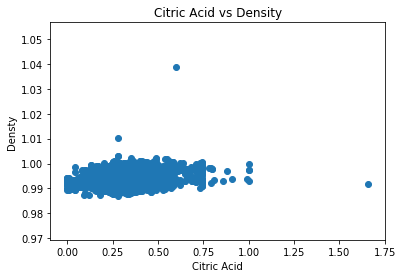

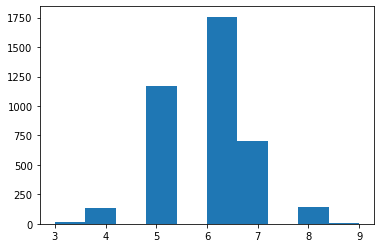

Accuracy: 0.48570699336396117


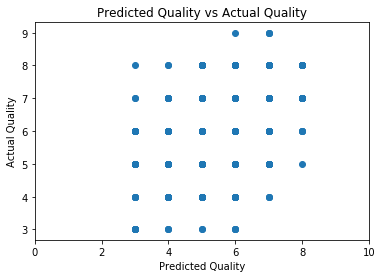

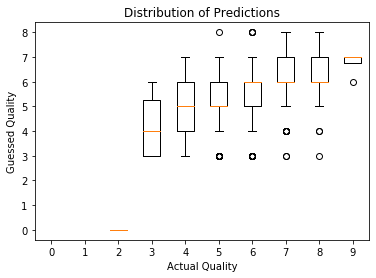

In [15]:
plt.title("Citric Acid vs Density")
plt.xlabel("Citric Acid")
plt.ylabel("Densty")
plt.scatter(my_data[:,2],my_data[:,7])
plt.show()
#edited_data = np.delete(my_data,10,1)
edited_data = np.delete(my_data,2,1)
#edited_data = np.delete(edited_data,7,1)
#edited_data = np.delete(edited_data,5,1)
#edited_data = np.delete(edited_data,4,1)
#edited_data = np.delete(edited_data,3,1)
edited_labels = labels.copy()
#edited_labels.pop(10)
edited_labels.pop(2)
#edited_labels.pop(7)
#edited_labels.pop(5)
#edited_labels.pop(4)
#edited_labels.pop(3)
plt.hist(my_data[:,-1])
plt.show()
foo=5 #stopping 
model = generate_model(edited_data,edited_labels)
eval_model(model,edited_data,edited_labels)

The prediction accuracy did not change significantly. This is likely caused by other noise in the input data set.

# 2G Evaluating on Training Data
Evualating my model on the testing data.

Accuracy: 0.5040816326530613


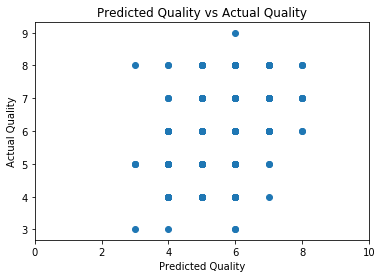

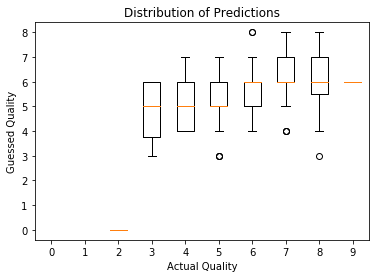

In [16]:
test_labels = []
test_data = []
with open("wine_test_set.csv") as csv_file:
    test_data = csv.reader(csv_file, delimiter=',', quotechar='|')
    test_labels = test_data.__next__()
test_data = np.loadtxt('wine_test_set.csv', delimiter=',',skiprows=1)
model = generate_model(my_data,labels)
eval_model(model,test_data,test_labels)

The test data's accuracy is very close to the training data. This indicates that there is little overfitting. 

# 2H: Selecting first 1000 and 100 Elements from the training set and viewing results

1000 Entries
Accuracy: 0.45408163265306123


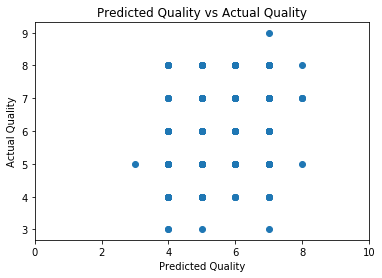

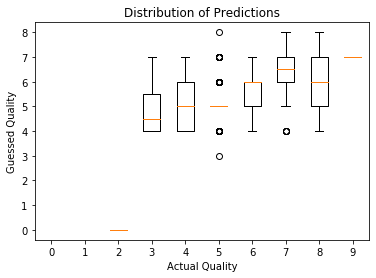

100 Entries
Accuracy: 0.4693877551020408


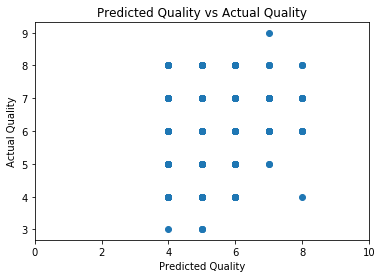

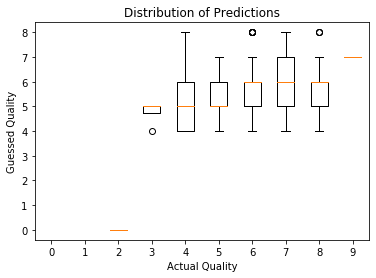

In [17]:
print("1000 Entries")
thousand_data = my_data[0:1000]
model=generate_model(thousand_data,labels)
eval_model(model,test_data,labels)
print("100 Entries")
hundred_data = my_data[0:100]
model=generate_model(hundred_data,labels)
eval_model(model,test_data,labels)

The prediction quality changed very little when moving from the full dataset to 100 or 1000 entries. This is likely caused by the data being very noisy and showing little consistent  trends for each dimension in the dataset.
# Conclusions
The quality of predictions changed very little when the dataset changed in size. This is likely due to the noise on each of the input dimensions being high. A solution could be to collect more kinds of data on wine. Another explanation may be that the quality of wine depended on some random factor such as the tastes of the person judging quality.